Սյունակները՝
year - հրդեհի պատահելու տարի
state ֊ Բրազիլիայի նահանգ
month ֊ հրդեհի պատահելու ամիս
number ֊ հրդեհի անձանագրումների քանակ
date ֊ հրդեհի արձանագրման ժամանակ

CSV ֆայլը ուսումնասիրելով(amazon.csv), կնկատեք, որ որոշ թվեր կոտորակային են, օրինակ 2.588 հատ հրդեհ իմաստ չունեցող տվյալ է։ Սա ուղղակի հազարները ցույց տալու համար է, տեխնիկական վրիպակի պատճառով դարձել է կոտորակ, այսինքն 2.588 նշանակում է 2588 անտառային հրդեհ. Սա հեշտ կֆիքսեք ֆայլը կարդալուց։
Ամիսները նշված են պորտուգալերեն


Պրոյեկտի համար մեզ անհրաժեշտ է հետևյալ գրադարանները՝
Pandas
Matplotlib
googletrans(ամիսները թարգմանելու համար)


Խնդիրը՝
Կարդալ ֆայլը և վերածել դատաֆրեյմի, հաշվի առնելով վերևի նշվածները
Բաժանեք դատան փոքր մասերի՝
* Առաջին բանը, որ կարելի է անել, վիզուալիզացնել հրդեհների քանակը ըստ տարիների, ամիսների


Հեռացրեք այն տողերը, որտեղ հրդեհների քանակը 0 է։ Նախ 0֊ները սարքեք Nan, հետո հեռացրեք
Խմբավորեք տվյալները ըստ ամիսների։ Արդյունքը լինելու է Series , ընդ որում ամիսները այբբենական կարգով։ Փոխեք, ամիսները ըստ ճիշտ հերթականության reindex֊ի միջոցով։
Googletrans գրադարանի միջոցով թարգմանել ամիսները
Վիզուալիզացրեք ստացված տվյալները՝ ներկայացնելով կապը ամիսների և այդ ամիսների ընթացքում եղած հրդեհների քանակի հետ


Ներբեռնել եմ անհրաժեշտ գրադարանները

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import googletrans
from googletrans import Translator

Կարդացել եմ ֆայլը, վերաշել DataFrame-ի, կանչել եմ amazone.head() հրամանը, որ պատկերացում կազմեմ ինչ տեսք ունի իմ DataFrame-ը: 
Գտել եմ տողերը որոնցում առկա է 0 արժեք, փոխել եմ Nan-ով և հեռացրել այդ տեղերը, արդյունքում ստացել եմ նոր DataFrame, որը ունի 5837 տող և 5 սյունյակ:

In [8]:
amazon = pd.read_csv('amazon.csv')
amazon.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1/1/1998
1,1999,Acre,Janeiro,0.0,1/1/1999
2,2000,Acre,Janeiro,0.0,1/1/2000
3,2001,Acre,Janeiro,0.0,1/1/2001
4,2002,Acre,Janeiro,0.0,1/1/2002


In [9]:
amazon = amazon.replace(0, np.nan)
amazon = amazon.dropna()
amazon.head()

,year,state,month,number,date
5,2003,Acre,Janeiro,10.0,1/1/2003
7,2005,Acre,Janeiro,12.0,1/1/2005
8,2006,Acre,Janeiro,4.0,1/1/2006
12,2010,Acre,Janeiro,1.0,1/1/2010
17,2015,Acre,Janeiro,1.0,1/1/2015


Հաջորդ քայլով DataFrame-ին տալիս եմ նոր ինդեքսներ, որպիսի ավելի ընթեռնելի լինի

In [10]:
amazon.set_index(np.arange(1,len(amazon) + 1), inplace = True)
amazon


,year,state,month,number,date
1,2003,Acre,Janeiro,10.0,1/1/2003
2,2005,Acre,Janeiro,12.0,1/1/2005
3,2006,Acre,Janeiro,4.0,1/1/2006
4,2010,Acre,Janeiro,1.0,1/1/2010
5,2015,Acre,Janeiro,1.0,1/1/2015
...,...,...,...,...,...
5833,2012,Tocantins,Dezembro,128.0,1/1/2012
5834,2013,Tocantins,Dezembro,85.0,1/1/2013
5835,2014,Tocantins,Dezembro,223.0,1/1/2014
5836,2015,Tocantins,Dezembro,373.0,1/1/2015


unique() հրամանով գտնել եմ ամիսները, արդյունքը պահպանվում է ցուցակի մեջ, ստեղծել եմ դատարկ ցուցակ, որտեղ լրացրել եմ թարգմանված ամիսները, Janeiro-ն չէր թարգմանում դրամ համար այն վերջում ձեռքով ավելացրել եմ ցուցակում և ստեղծել եմ Dict, որի keys-ը ամիսների պորտուգալերեն անուններն են, իսկ values-ը անգլերեն:

In [11]:
unique_months = amazon.month.unique()
eng_months = []
translator = Translator()

for month in unique_months:
    translated = translator.translate(month)
    eng_months.append(translated.text)

eng_months[0] = 'Januray'

months_dict = dict(zip(unique_months, eng_months))
months_dict

{'Janeiro': 'Januray',
 'Fevereiro': 'February',
 'Marзo': 'March',
 'Abril': 'April',
 'Maio': 'May',
 'Junho': 'June',
 'Julho': 'July',
 'Agosto': 'August',
 'Setembro': 'September',
 'Outubro': 'October',
 'Novembro': 'November',
 'Dezembro': 'December'}

for ցիկլի իջոցով փոխել եմ պորտուգալերեն ամիսների անունները անգլերենով, inplace=True եմ արել, որ DataFrame-ը միանգամից պահպանվի նոր արժեքերով

In [12]:
for i in months_dict.keys():
    amazon.replace(i, months_dict[i], inplace=True)

գտել եմ գոլոր 2.588 ֆորմատով թվերը և բազմապատկել հազարի ու փոխել նրանց

In [13]:
for number in amazon['number']:
    if number % 1 != 0:
        amazon.replace(number, round(number * 1000, 0), inplace=True)
amazon

,year,state,month,number,date
1,2003,Acre,Januray,10.0,1/1/2003
2,2005,Acre,Januray,12.0,1/1/2005
3,2006,Acre,Januray,4.0,1/1/2006
4,2010,Acre,Januray,1.0,1/1/2010
5,2015,Acre,Januray,1.0,1/1/2015
...,...,...,...,...,...
5833,2012,Tocantins,December,128.0,1/1/2012
5834,2013,Tocantins,December,85.0,1/1/2013
5835,2014,Tocantins,December,223.0,1/1/2014
5836,2015,Tocantins,December,373.0,1/1/2015


describe()-ի և describe(include = ['object']) ընդհանուր տեղեկատվություն ա տալիս DataFrame-ի վերաբրյալ

In [14]:
amazon[['number']].describe()

,number
count,5837.000000
mean,625.157444
std,1720.009767
min,1.000000
25%,16.000000
50%,73.000000
75%,360.000000
max,25963.000000


In [15]:
amazon.describe(include = ['object'])

,state,month,date
count,5837,5837,5837
unique,23,12,20
top,Rio,October,1/1/2016
freq,661,534,317


Վիզուալիզացրել եմ հրդեհների քանակը ըստ տարիների և հրդերներիի միջին քանակը ըստ տարինեի, և  հրդեհների քանակը ըստ ամիսների և հրդերներիի միջին քանակը ըստ ամիսների
mamtplolib գրադարանի միջոցով


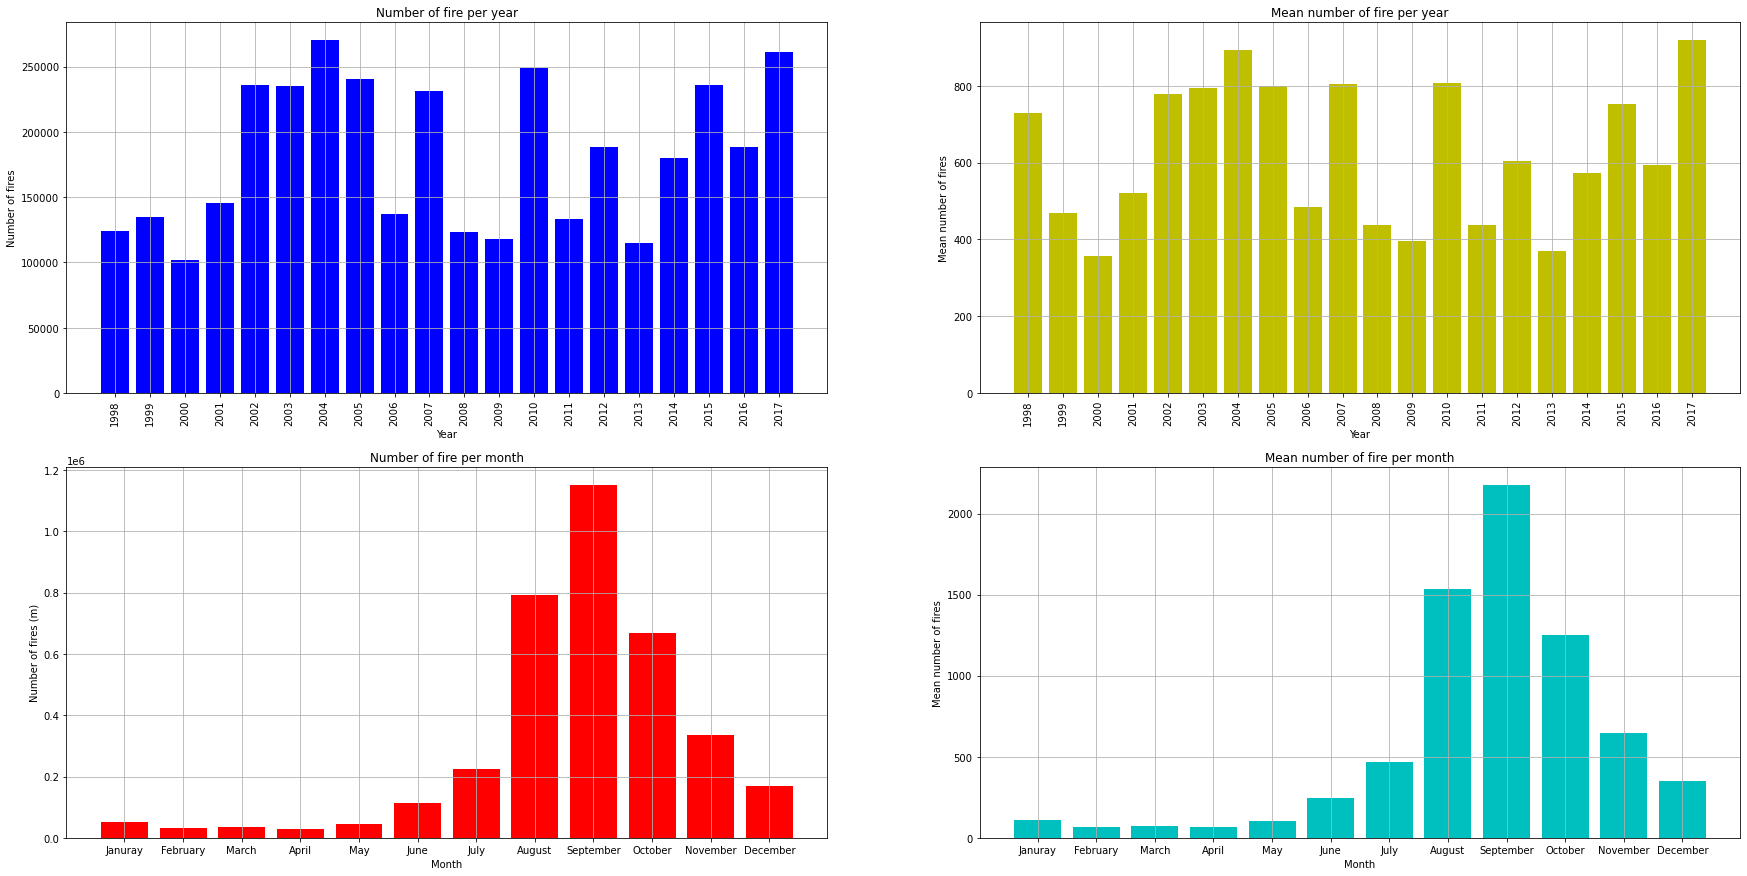

In [16]:
new_index = ['Januray', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
years = np.arange(1998, 2018)

fire_per_year = amazon.groupby('year')['number'].sum()
mean_fire_per_year = amazon.groupby('year')['number'].mean()

fire_per_month = amazon.groupby('month')['number'].sum().reindex(new_index)
mean_fire_per_month = amazon.groupby('month')['number'].mean().reindex(new_index)

fig = plt.figure(figsize = (30,15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.bar(fire_per_year.index, fire_per_year.values, color = 'b')
ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation = 90)
ax1.grid()
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of fires')
ax1.set_title('Number of fire per year')

ax2.bar(mean_fire_per_year.index, mean_fire_per_year.values, color = 'y')
ax2.set_xticks(years)
ax2.set_xticklabels(years, rotation = 90)
ax2.grid()
ax2.set_xlabel('Year')
ax2.set_ylabel('Mean number of fires')
ax2.set_title('Mean number of fire per year')

ax3.bar(fire_per_month.index, fire_per_month.values, color = 'r')
ax3.grid()
ax3.set_xlabel('Month')
ax3.set_ylabel('Number of fires (m)')
ax3.set_title('Number of fire per month')

ax4.bar(mean_fire_per_month.index, mean_fire_per_month.values, color = 'c')
ax4.grid()
ax4.set_xlabel('Month')
ax4.set_ylabel('Mean number of fires')
ax4.set_title('Mean number of fire per month')

plt.show()

Վիզուալիզացրել եմ հրդեհների քանակը ըստ նահանգների 
Pandas գրադարանի միջոցով

[Text(0, 0.5, 'Number of fire'), Text(0.5, 0, 'State')]

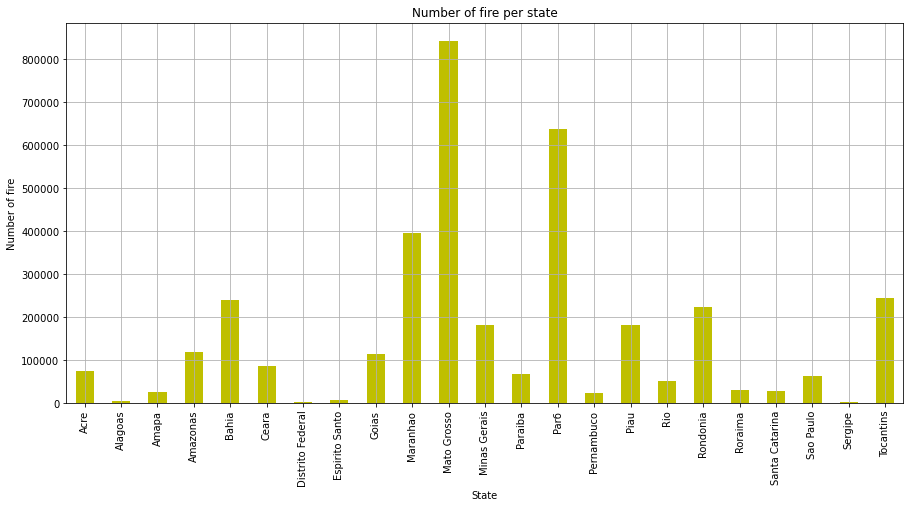

In [17]:
fire_per_state = amazon.groupby('state')['number'].sum()
fire_per_state.plot.bar(figsize=(15,7),title='Number of fire per state', color = 'y', grid = 'True').set(ylabel='Number of fire', xlabel='State')


Վիզուալիզացրել եմ հրդերներիի միջին քանակը ըստ նահանգների
Pandas գրադարանի միջոցով

[Text(0, 0.5, 'Number of fire'), Text(0.5, 0, 'State')]

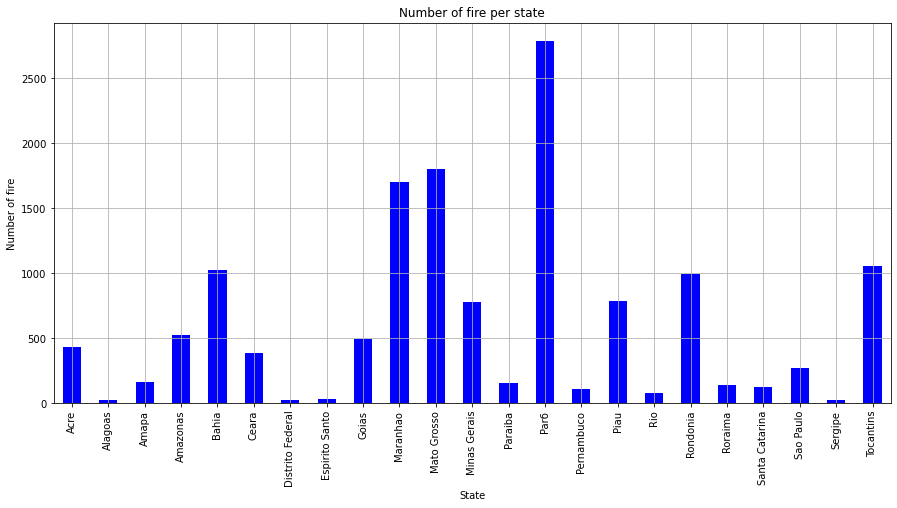

In [18]:
mean_fire_per_state = amazon.groupby('state')['number'].mean()
mean_fire_per_state.plot.bar(figsize=(15,7),title='Number of fire per state', color = 'b', grid = 'True').set(ylabel='Number of fire', xlabel='State')
